# Important: Run this code cell each time you start a new session!

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install os
!pip install opencv-python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [2]:
!wget -Ncnp https://physionet.org/files/images/1.0.0/E1154S7I000.png
!wget -Ncnp https://physionet.org/files/images/1.0.0/E1154S7I024.png

--2024-09-18 21:22:43--  https://physionet.org/files/images/1.0.0/E1154S7I000.png
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117853 (115K) [image/png]
Saving to: ‘E1154S7I000.png’

E1154S7I000.png     100%[===================>] 115.09K   719KB/s    in 0.2s    

2024-09-18 21:22:43 (719 KB/s) - ‘E1154S7I000.png’ saved [117853/117853]

--2024-09-18 21:22:43--  https://physionet.org/files/images/1.0.0/E1154S7I024.png
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115358 (113K) [image/png]
Saving to: ‘E1154S7I024.png’

E1154S7I024.png     100%[===================>] 112.65K   726KB/s    in 0.2s    

2024-09-18 21:22:43 (726 KB/s) - ‘E1154S7I024.png’ saved [115358/115358]



In [3]:
import shutil
import os
orig_file = os.path.join('E1154S7I000.png')
os.rename(orig_file, 'bw_mra_single.png')
orig_file = os.path.join('E1154S7I024.png')
os.rename(orig_file, 'bw_mra_multiple.png')

In [4]:
import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
def colab2pdf():
    locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
    NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
    TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
    NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=30)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
    warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
    with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
    if not pathlib.Path("/usr/local/bin/quarto").exists():
        !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
    with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
    !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
    google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))

# Instructions

Please complete all of the exercises below. Across this module, some of the exercises are expected to produce very specific outputs, while others may have a variety of reasonable answers.

# Exercise 1: Working with Basic Shapes and Colors

This exercise will require drawing shapes on a blank image created using the following function:

In [5]:
def create_black_img():
    return np.zeros((300,300,3), np.uint8)

**(Part 1)** Write code that draws a red circle with the following properties:
* Center at position `x = 250, y = 100`
* Radius of `25`
* Outline thickness of `3`

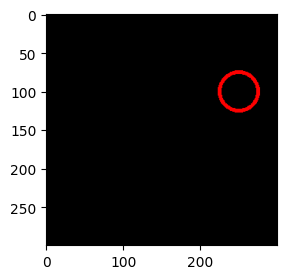

In [6]:
img = create_black_img()
cv2.circle(img, center=(250, 100), radius=25,
           color=(255, 0, 0), thickness=3)
plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.show()

**(Part 2)** Write code that draws a filled magenta rectangle with the following properties:
* Top left corner at position `x = 50, y = 100`
* Height of `50`
* Width of `100`


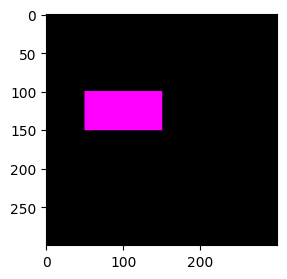

In [7]:
img = create_black_img()
top_left = (50, 100)
h = 50
w = 100
bottom_right = (top_left[0]+w, top_left[1]+h)
cv2.rectangle(img, pt1=top_left, pt2=bottom_right,
              color=(255, 0, 255), thickness=-1)
plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.show()

**(Part 3)** Write code that draws a filled white ellipse with the following properties:
* Center at position `x = 100, y = 200`
* Major axis of `100`
* Minor axis of `25`
* No rotation

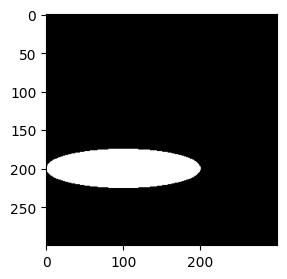

In [8]:
img = create_black_img()
cv2.ellipse(img, center=(100, 200), axes=(100, 25), angle=0,
            startAngle=0, endAngle=360,
            color=(255, 255, 255), thickness=-1)
plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.show()

# Exercise 2: Identifying a Region of Interest in an MRA Image

This exercise will revolve around a magnetic resonance angiography (MRA) image showing a coronal slice from an anteroposterior position within the torso. We have already taken the liberty of applying a binary threshold to reveal the prominent regions of the MRA image.

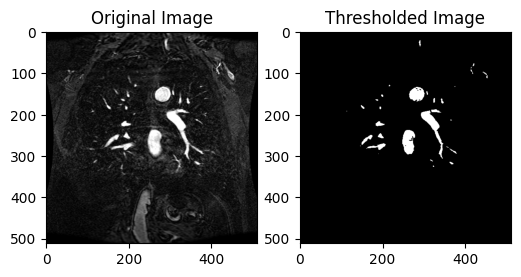

In [9]:
img = cv2.imread('bw_mra_multiple.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, img_thresh = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1), plt.title('Original Image')
plt.imshow(img)
plt.subplot(1, 2, 2), plt.title('Thresholded Image')
plt.imshow(img_thresh, cmap='gray')
plt.show()

Notice that the binary image still contains numerous regions: three prominent ones along the center and right side of the image, and many smaller ones along the left side and the periphery. Our goal is to measure the radius of the round blob in the upper half of the image.

**(Part 1)** Write code that collects a list of the contours corresponding to the three largest regions in the binary image. There are multiple ways of doing this, but here are a couple of suggestions:
1. Sort all of the contours by their size and then pick the three largest shapes
2. Iterate through the contours and keep the ones whose size exceed a minimum threshold defined by you

To confirm that this is working properly, draw green outlines around these regions using the code provided.

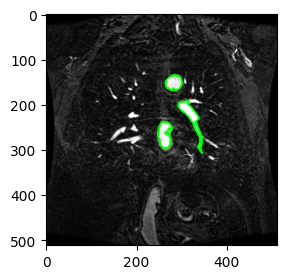

In [10]:
# Locate the contours
cnts, hierarchy = cv2.findContours(img_thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Only keep the contours that pass the size check
large_cnts = []
for cnt in cnts:
    cnt_area = cv2.contourArea(cnt)
    if 500 < cnt_area:
        large_cnts.append(cnt)

# Draw the outlines on the image
output_img = img.copy()
for cnt in large_cnts:
    cv2.drawContours(output_img, [cnt], -1, (0, 255, 0), 3)

# Show the result
plt.figure(figsize=(6, 3))
plt.imshow(output_img, cmap='gray')
plt.show()

**(Part 2)** Write code that identifies the most circular contour out of the three regions that were selected in the previous problem. Draw a green outline around it using the code provided.

*Hint:* Think about the contour properties we covered during the lecture. A circle is a special kind of ellipse where the major and minor axes are equal.

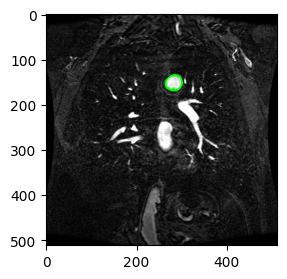

In [11]:
# Iterate through all of the contours
circular_cnt = None
min_axis_ratio = 1e6
for cnt in large_cnts:
    # Calculate the "roundness" using the ratio of the major and minor axes
    cnt_ellipse = cv2.fitEllipse(cnt)
    cnt_axes = cnt_ellipse[1]
    cnt_axis_ratio = cnt_axes[0]/cnt_axes[1]
    # Save the contour if this one is more round than past ones
    if cnt_axis_ratio < min_axis_ratio:
        circular_cnt = cnt

# Draw the outlines on the image
output_img = img.copy()
cv2.drawContours(output_img, [circular_cnt], -1, (0, 255, 0), 3)

# Show the result
plt.figure(figsize=(6, 3))
plt.imshow(output_img, cmap='gray')
plt.show()

**(Part 3)** Write code that calculates the radius of the circular region that you have identified in pixels.

In [12]:
circle_outline = cv2.minEnclosingCircle(circular_cnt)
circle_outline[1]

18.909337997436523

# Prepare Submission

To get full credit for this assignment, you should submit your assignment in two formats so that we can easily grade and debug your code:
1. **.ipynb:** First, confirm that your code can run from start to finish without any errors. To check this, go to "Runtime" > "Run all" in the Google Colab menu. If everything looks good, you can export your file by going to "File" > "Download" > "Download .ipynb".
2. **.pdf:** Run the function called `colab2pdf()` below. This will automatically convert your notebook to a PDF. Note that while "File" > "Print" > "Save as PDF" also works, it requires you to manually expand all of the cells and may cut off some images.

In [13]:
colab2pdf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>